# ANALYSIS OF MARRIOTT HOTEL BOOKINGS

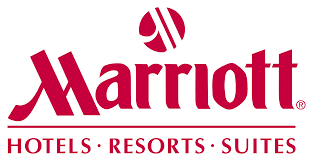

## Business Problem

****This project analyzes booking data from City Hotel and Resort Hotel to identify key factors influencing high cancellation rates. The goal is to provide data-driven insights and recommendations to improve revenue management and room occupancy.****

## Importing Libraries

In [525]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

## Loading the dataset

In [248]:
df=pd.read_csv('hotel_bookings 2.csv')


In [440]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,7


In [252]:
df.shape

(119390, 32)

In [16]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [18]:
df.info()#checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [254]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y')
#changing the data type of the column to datetime format

## Data cleaning

In [48]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [50]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [126]:
df.describe(include='object').columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

In [128]:
 print(df['hotel'].unique())

['Resort Hotel' 'City Hotel']


In [58]:
#checking missing vaalues
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [256]:
df.drop(['agent','company'],axis=1,inplace=True)

In [258]:
df.dropna(inplace=True)

In [260]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [74]:
df.shape

(118898, 30)

In [80]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [262]:
df=df[df['adr']<5000]

## Data Analysis and Visualisation

### Cancellation trends

In [266]:
cancelled_perc=df['is_canceled'].value_counts()

In [268]:
cancelled_perc

is_canceled
0    74745
1    44152
Name: count, dtype: int64

In [270]:
cancelled_perc=df['is_canceled'].value_counts(normalize=True)

In [144]:
cancelled_perc

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

***Overall 37% of the bookings are canceled, which has a significant impact on the hotels' earnings***

### Reservation Status Count

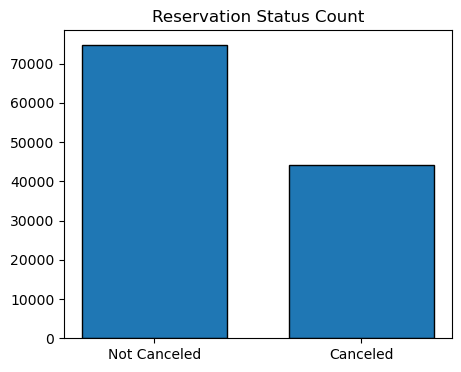

In [272]:
cancelled_perc=df['is_canceled'].value_counts()

plt.figure(figsize=(5,4))
plt.title('Reservation Status Count')
plt.bar(['Not Canceled','Canceled'],df['is_canceled'].value_counts(),edgecolor='k',width=0.7)
plt.show()

## Cancellation Trends: Resort Hotel vs. City Hotel

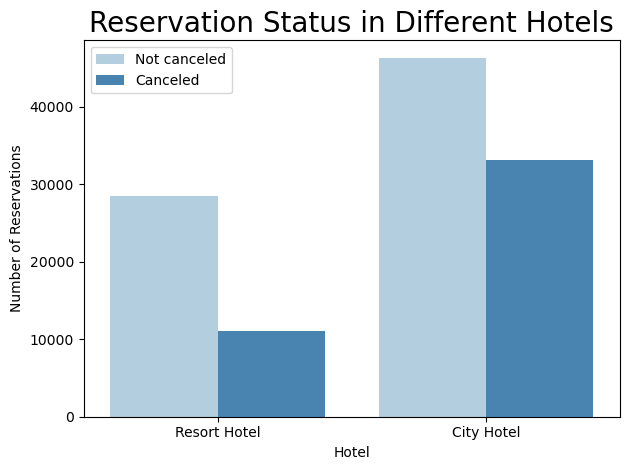

In [274]:
sns.countplot(x='hotel',hue='is_canceled',data=df,palette='Blues')
plt.title('Reservation Status in Different Hotels',size=20)
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')
plt.legend(['Not canceled','Canceled'])
plt.tight_layout()
plt.show()

### Cancellation Status in Resort Hotels

In [519]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts()

is_canceled
0    28519
1    11077
Name: count, dtype: int64

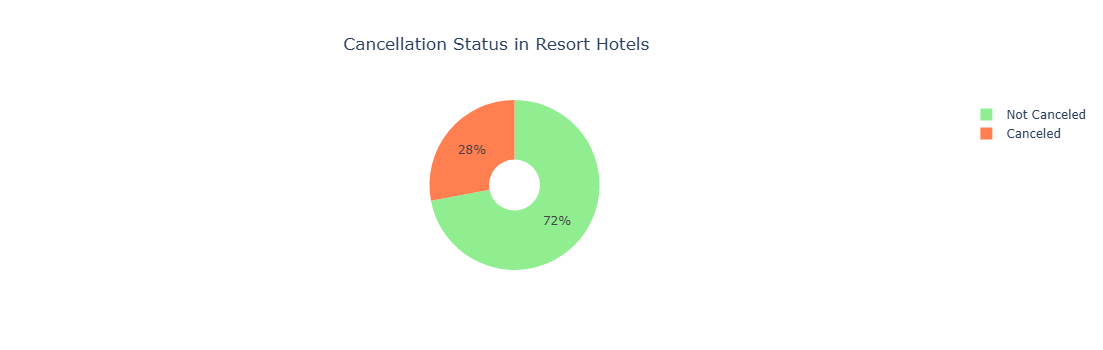

In [548]:
resort = resort_hotel['is_canceled'].value_counts()

# Rename the categories in the Series
resort = resort.rename({0: "Not Canceled", 1: "Canceled"})

fig = go.Figure(data=[go.Pie(labels=resort.index, values=resort.values , marker_colors=['lightgreen','coral'])])
fig.update_layout(title_text='Cancellation Status in Resort Hotels', title_x=0.45, width=450, height=350)
fig.update_traces(hole=0.3)
fig.show()

***This indicates that 28% of the reservations at the Resort Hotel were canceled, and 72% were not.***

### Cancellation Status in City Hotels

In [544]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts()

is_canceled
0    46226
1    33075
Name: count, dtype: int64

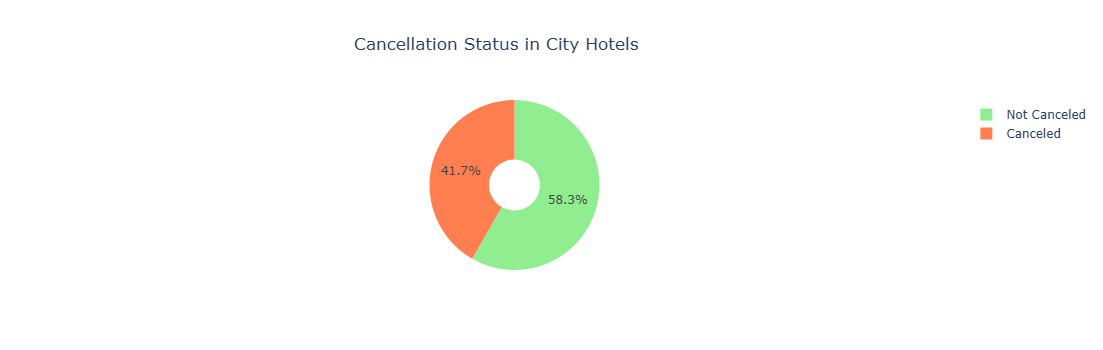

In [550]:
city = city_hotel['is_canceled'].value_counts()

city = city.rename({0: "Not Canceled", 1: "Canceled"})

fig = go.Figure(data=[go.Pie(labels=city.index, values=city.values, marker_colors=['lightgreen','coral'])])
fig.update_layout(title_text='Cancellation Status in City Hotels', title_x=0.45, width=450, height=350)
fig.update_traces(hole=0.3)
fig.show()

***This indicates that 42% of the reservations at the City Hotel were canceled, and 58% were not.***

***Higher Cancellation Rate at City Hotel: City Hotel has a significantly higher cancellation rate (41.73%) compared to the Resort Hotel (27.76%), suggesting the need for targeted strategies to address this issue.***

## Average Daily Rate in resort and city hotels

In [111]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()

In [113]:
resort_hotel

,adr
reservation_status_date,
1/1/2015,61.966667
1/1/2016,122.366111
1/1/2017,200.999714
1/10/2015,66.102667
1/10/2016,103.119286
...,...
9/8/2016,187.970000
9/8/2017,223.363143
9/9/2015,99.663889


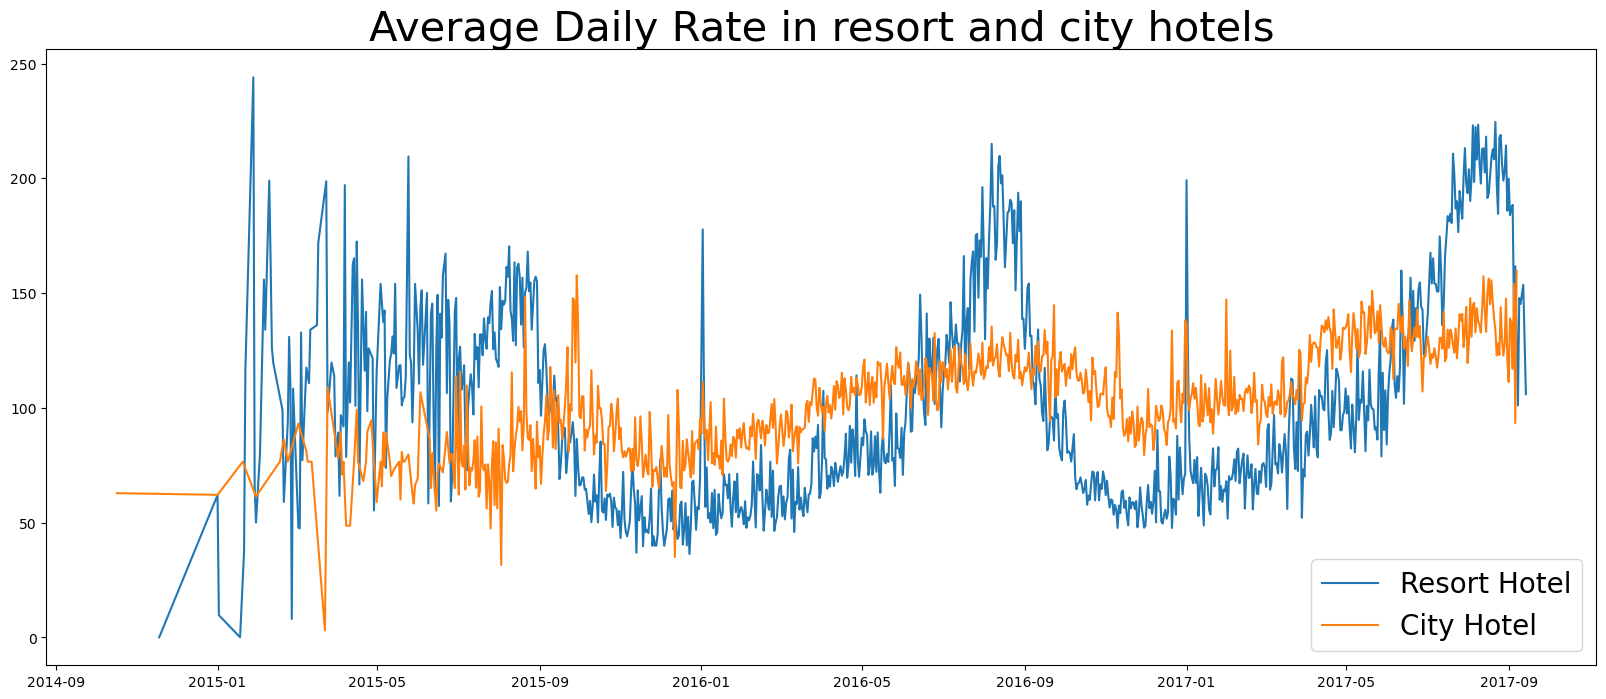

In [516]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in resort and city hotels',fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='City Hotel')
plt.legend(fontsize=20)
plt.show()

***Fluctuations in Resort Hotels: The ADR for Resort Hotels shows significant variability over time.***
***There are noticeable peaks during certain periods like, weekends,holiday seasons or times of higher demand(summer and year-end holidays).***

***Stability in City Hotels: The ADR for City Hotels is relatively stable compared to Resort Hotels.***
***This suggests that demand and pricing for city accommodations might be less affected by seasonal factors and more influenced by consistent business or travel activity.***

## Reservation status per month

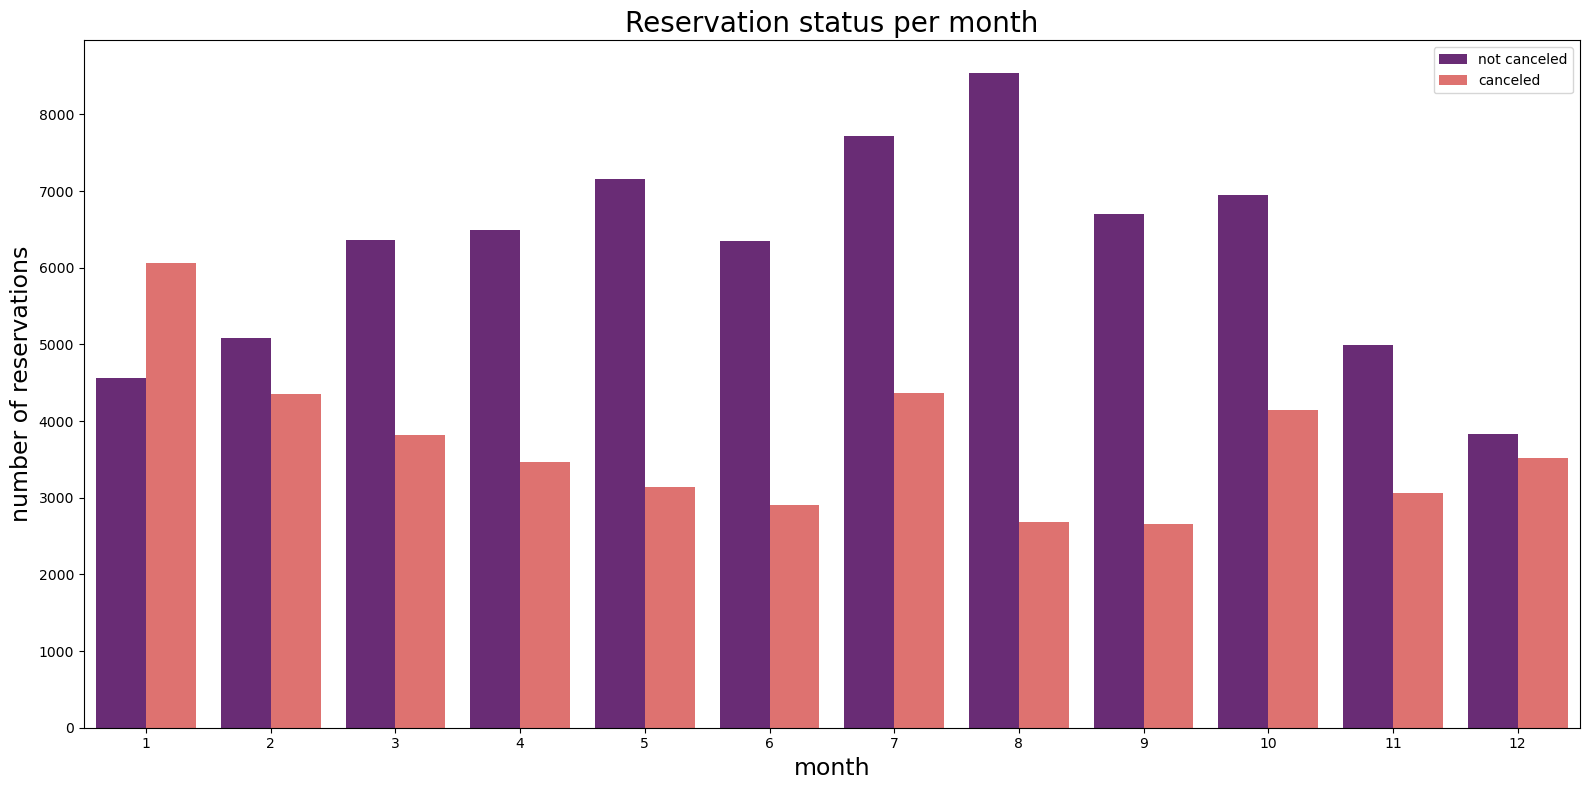

In [284]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
sns.countplot(x='month' , hue='is_canceled', data=df , palette='magma')
plt.title('Reservation status per month',size=20)
plt.xlabel('month', size=17)
plt.ylabel('number of reservations',size=17)
plt.legend(['not canceled', 'canceled'])
plt.tight_layout()
plt.show()

***Monthly Trends: The number of reservations varies significantly across different months. The highest number of reservations occurs in August, followed by July and March. This indicates peak months for hotel reservations.***

***Cancellation Rates: The number of canceled reservations is consistently lower than the number of not canceled reservations for all months. However, the proportion of cancellations varies. For instance, January and December have relatively higher cancellation rates compared to other months.***

***Seasonal Patterns: There is a noticeable increase in reservations during the summer months (June, July, and August). This suggests a seasonal trend where more people book hotels during the summer, possibly for vacations or travel.***

### ADR per Month

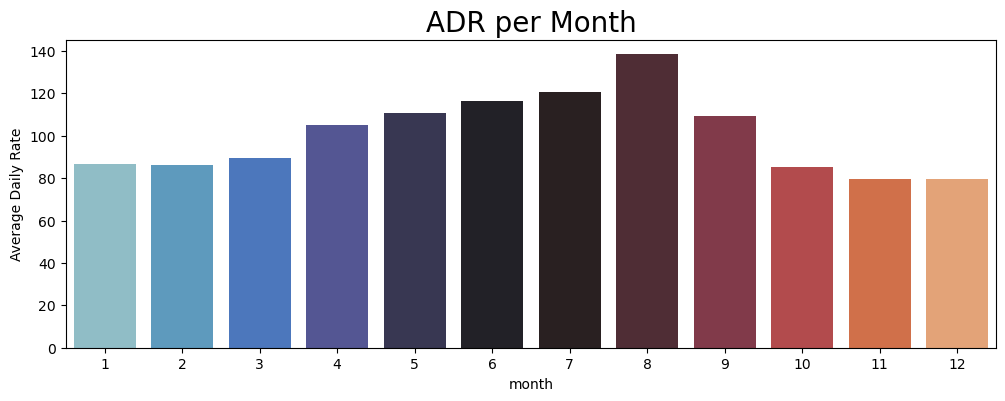

In [370]:

plt.figure(figsize=(12,4))
plt.title('ADR per Month',fontsize=20)
sns.barplot(x='month',y='adr',data = df.groupby('month')[['adr']].mean().reset_index(),palette='icefire')
plt.xlabel('month', size=10)
plt.ylabel('Average Daily Rate',size=10)
plt.show()

***The highest average daily rate is observed in August,The lowest average daily rates are observed in January and February***

***Seasonal Trend: There is a noticeable increase in the average daily rate from January to August, with a peak in August. This upward trend indicates increasing demand as the year progresses towards the summer months.***

***Decline After Peak: After August, the average daily rate decreases, with a significant drop in September and continuing to decrease towards December. This decline suggests a reduction in demand after the peak summer season.***

## Top 10 Countries Contributing to Reservation Cancellations

In [513]:
#################################################
df.groupby('month')[['adr']].mean()
df.groupby('month')[['adr']].mean().reset_index()
canceled_data=df[df['is_canceled']==1]
top_10_country=canceled_data['country']
top_10_country=canceled_data['country'].value_counts()
top_10_country=canceled_data['country'].value_counts()[:10]

country
PRT    27514
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: count, dtype: int64

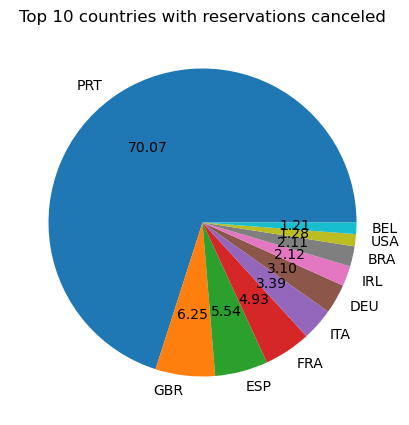

In [413]:
canceled_data=df[df['is_canceled']==1]
top_10_country=canceled_data['country'].value_counts()[:10]
plt.figure(figsize=(5,5))
plt.title('Top 10 countries with reservations canceled')
plt.pie(top_10_country,autopct='%.2f',labels=top_10_country.index)
plt.show()

***Portugal (PRT) has the highest percentage of cancelled reservations by a significant margin, accounting for 70.07% of the total cancellations. Need to improve hotel quality and service standards in Portugal to minimize cancellation rates.***

### Distribution of Bookings by Market Segment

In [511]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

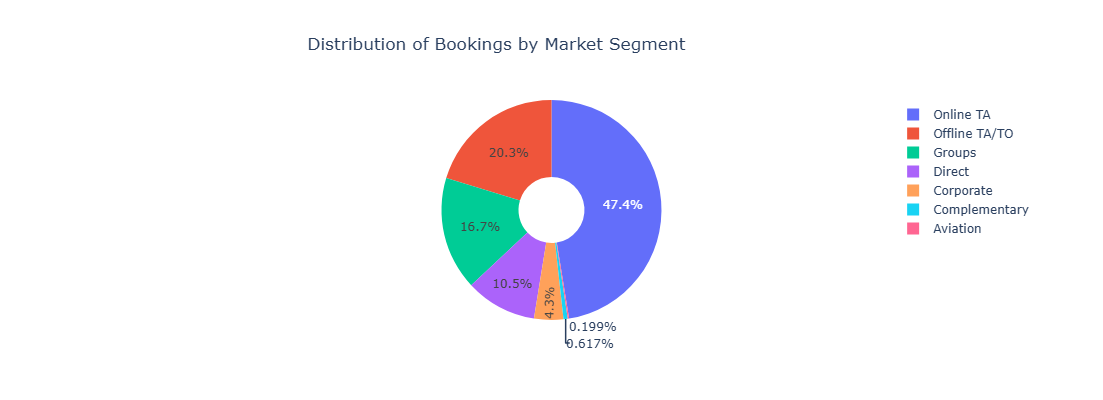

In [504]:
import plotly.express as px
import plotly.graph_objects as go

market=df['market_segment'].value_counts()
fig=go.Figure(data=[go.Pie(labels=market.index,values=market.values)])
fig.update_layout(title_text='Distribution of Bookings by Market Segment',
                  title_x=0.45,width=500,height=400)
fig.update_traces(hole=0.3)
fig.show()

***Online Travel Agencies accounts for the largest share, 47.4% of bookings.This highlights the critical role of online platforms in driving hotel bookings, likely due to their accessibility and ease of use for customers.***